# Predicting Heart Disease using machine learning 

This notebook looks into using various python-based learning and scinece libraries in an attempto to build a model to predict whether a person has heart disease or not based on medical attributes.

We're going to take following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
> Given clinical parameter about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from https://archive.ics.uci.edu/ml/datasets/heart+disease

Dataset from kaggle:https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evalutaion

> If we can reach 95% accuracy at prediction whether a patient has heart disease , we'll pursue the project.

## 4. Features

This is where you get different information about each of the features in your data.
* age
* sex (1=male,0=female)
* chest pain type (4 values)
     * 0:Typical angina: chest pain related decrease blood supply to the heart
     * 1:Atypical angina: chest pain not related to heart
     * 2:Non-anginal pain: typically esophageai spasmas(not heart related)
     * 3:Asymptomatic: chest pain not showing signs of diesease
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* thalach-maximum heart rate achieved
* exang: exercise induced angina(1-yes, 0-no)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* targe

## Preparing the tools 

We're going to use pandas , matplotlib and numpy for data analsis and maniputlaiton.

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory Data Analysis) plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# We want to plot to appear in our notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape #(rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more  about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you tyring to solve?
2. What kind of data do we have and how do we treat different types?
3. Whta's missing from the data and how to deal with it?
4. What are the outliear and why should you care about them?
5. How can you add, change or remove features to get more out of your data? 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Lets find out how many of each class ther
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

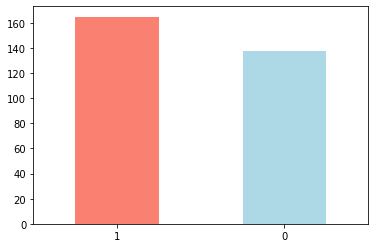

In [6]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue']);
plt.xticks(rotation=0);


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to gender

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target comlumn with gender column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


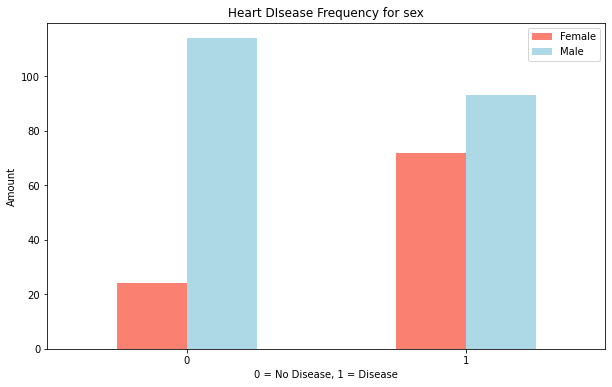

In [12]:
# Create a plot of cross tab 
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                    color=['salmon','lightblue']
                                   );
plt.title('Heart DIsease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease


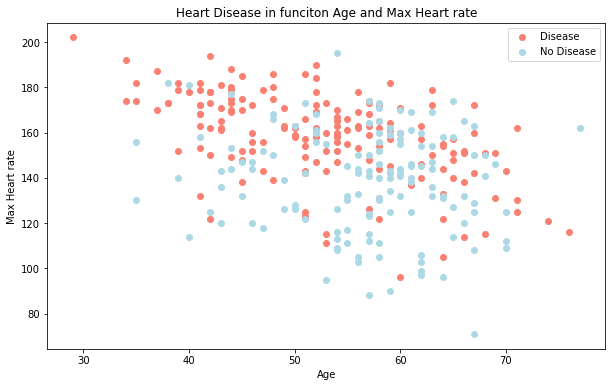

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter wth positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon');

# Scatter with negative exmaples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue');

# Add some helpful info
plt.title('Heart Disease in funciton Age and Max Heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['Disease','No Disease']);

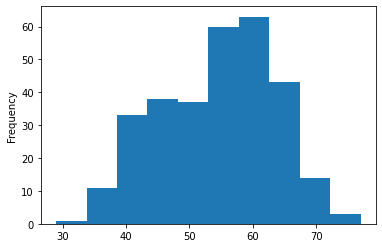

In [14]:
# Check the distribution of age column with histogram
df.age.plot.hist();

### Heart Disease Frequency for Chest Pain types
 
 * 0:Typical angina: chest pain related decrease blood supply to the heart
     * 1:Atypical angina: chest pain not related to heart
     * 2:Non-anginal pain: typically esophageai spasmas(not heart related)
     * 3:Asymptomatic: chest pain not showing signs of diesease

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


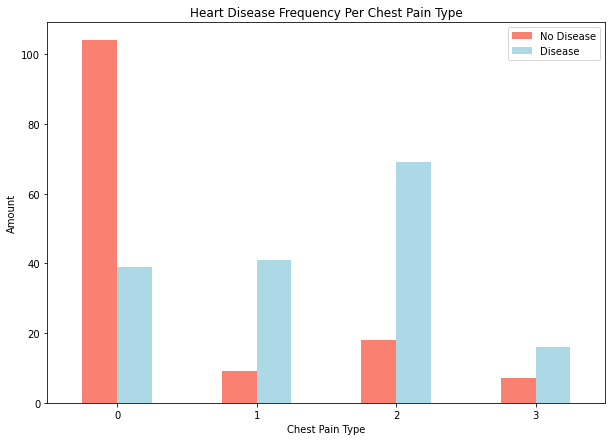

In [16]:
# Make the cross tab more more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,7),
                                 color=['salmon','lightblue'])

# Add some information on graph
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
#  Make a correlation matix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


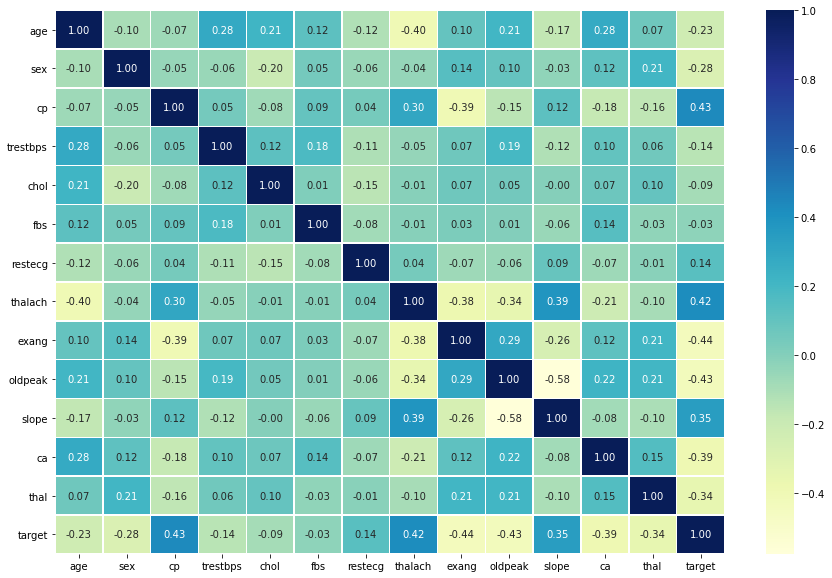

In [19]:
#Let's make our correlation matrix more prettire
corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt='.2f',
              cmap='YlGnBu');


## Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into X and y
X = df.drop('target',axis=1)
y=df['target']


In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64, 242)

Now we've got our data into training and test sets , it's time to build model.

We'll train(find patterns) on the training set.

And we'll test it(use the patterns) on the test sets.

We're going to try 3 different machine learning model.
1. Logistic regression
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier


In [29]:
# Put models into dictionary
models ={'Logistic Regression': LogisticRegression(),
         "KNN":KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """Fits and evalutes given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(no labels)
    X_test: testing data (no labels)
    y_treain: training labels
    y_test: test labels"""
    # Set reandom seed
    np.random.seed(42)
    #Make a dict to keep model score
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model into data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision

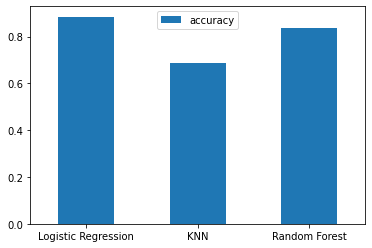

In [44]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

NOw we've got basline model and first predictions are not always what we should based our next step off.
What should we do? 

Let's look at the following:
* Hyperparameter tuning
* Fearture importance
* Confusion matrix
* Cross-validatin
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(ROC)

### Hyperparameter tuning

Tunings:
    1. by hand
    2. RandomizedSearchCV
    3. GridSearchCV

In [48]:
#let's tune KNN

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,21)

#Setup KNN instance
knn= KNeighborsClassifier()
#loop through dfferent n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [49]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [51]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test data: 75.41%


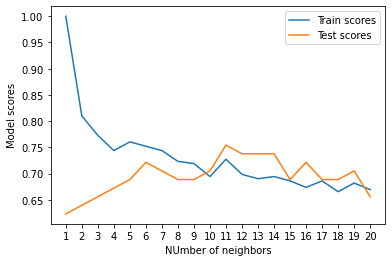

In [56]:
plt.plot(neighbors,train_scores,label='Train scores')
plt.plot(neighbors,test_scores,label='Test scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('NUmber of neighbors')
plt.ylabel('Model scores')
plt.legend()

print(f'Max KNN score on the test data: { max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using Randomized SearchCV

In [67]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={'C': np.logspace(-4,4,20),
             'solver':['liblinear']}

#Create hyperparameter grid for RandomForestClassifier
rf_grid={'n_estimators':np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}

NOw we've got hyperpareameter grid for each model. lets tune them using Randomized SearchCV...

In [65]:
#Tune logistice regression


np.random.seed(42)
# setup random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for LOgisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [64]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tunerd Logistic Regression we now tune RandomForestClassifier

In [68]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparamert search for Randomforest classifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True
                        )
#Fit random hyperprameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [70]:
#Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [71]:
# Evaluate teh randomizedsearch RandomForestClass
rs_rf.score(X_test,y_test)

0.8688524590163934

In [72]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### HyperParameter Tuning with GridSearchCV

Since LogisticeRegression model provides more accuracy, we'll try to increase more.

In [73]:
# Different hyperparameters for our logistic Regression

log_reg_grid={'C':np.logspace(-4,4,30),
             'solver':['liblinear']}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
#Fit our hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [74]:
#CHeck best hyperparmeter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [91]:
#Evaluate the grid search Logistic Regression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [76]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluation of model beyond accuracy
* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall 
* F1-recall

...it would be great if cross-validation was used where possible.

### First we need to make predictions.

In [80]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

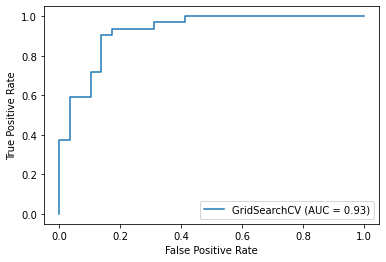

In [82]:
# Plot roc curve and calculate and calculate AUC metric

plot_roc_curve(gs_log_reg,X_test,y_test);

In [83]:
# Cnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


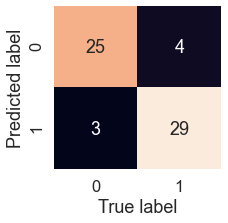

In [87]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """Plots confusion matrix using Seaborn heatmap"""
    fig,ax=plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel('Predicted label')
plot_conf_mat(y_test,y_preds)

Classification report and cross_validated precision, recall and f1-score

In [88]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculater evaluation metrics using cross validation


In [92]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [93]:
# create new calssifier with best parameters
clf = LogisticRegression(C =0.20433597178569418,
                        solver = "liblinear")

In [138]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [103]:
#Cross validated precisoion
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [104]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [105]:
#Cross validated F1_score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

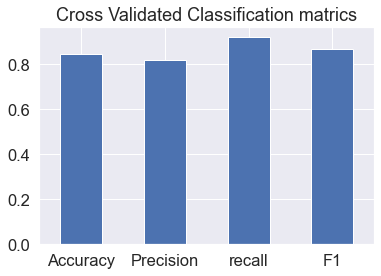

In [112]:
# Visulaize our crosss validated matrix
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                         'Precision': cv_precision,
                         "recall": cv_recall,
                         'F1': cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title='Cross Validated Classification matrics',
                   legend=False)
plt.xticks(rotation=0);

### Feature importance

Feature importance is another way of asking ' Which feature contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance for each machine learning model.

In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's find features important for our logistic regression.

In [114]:
# Fit an instance of Logistic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [117]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver = 'liblinear')
clf.fit(X_train,y_train);

In [133]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044649,  0.66067041, -0.01156993, -0.00166374,
         0.04386108,  0.31275845,  0.02459361, -0.60413079, -0.56862805,
         0.45051627, -0.63609896, -0.67663372]])

In [135]:
# match coef's of features to columnn
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672799501859627,
 'sex': -0.8604464852464384,
 'cp': 0.6606704146060298,
 'trestbps': -0.01156993166388755,
 'chol': -0.001663744419960415,
 'fbs': 0.04386107685747963,
 'restecg': 0.3127584515235279,
 'thalach': 0.024593613562863888,
 'exang': -0.6041307872269133,
 'oldpeak': -0.5686280479356108,
 'slope': 0.45051627405106476,
 'ca': -0.6360989586633043,
 'thal': -0.6766337229536633}

In [124]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860446,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


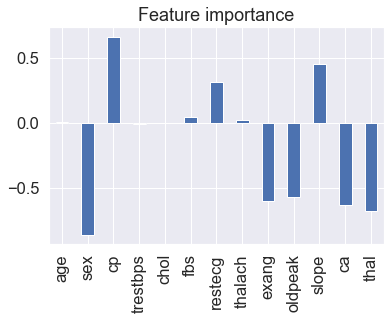

In [129]:
feature_df.T.plot.bar(title="Feature importance",legend=False);

In [136]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [137]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Experimentation

If we don't get our evalutaion metric yet.... 

* could we collect more data?
* could we try better model? Like CatBOost or XGBoost?
* Could we imporve the current model ( beyond we've done so far?)
* If our model is good enough (we hit evaluation metric) how to share? -pickle, -joblib